# Intro
This file containds the main code for simulation of a mobile robot kinematics with a detailed derivation. Currently it only has one robot class but different types of mobile robots will be added soon.

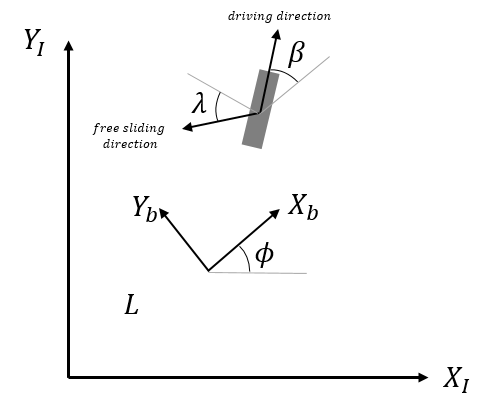

1. Inertial frame is located in a fix position and is denoted by ${X_I,Y_I}$
2. Body frame is attached to the center of mass of the robot and is denoted by ${X_b,Y_b}$
3. Wheel frame is attached to the center of each wheel. This frame is denoted by ${X_w,Y_w}$

Other details
1. $\phi$ is the angle between $X_b$ and $X_I$
2. Origin of each wheel is denoted by ${x_i,y_i}$
3. $\beta_i$ is the angle between ${X_w}$ and ${X_b}$. ${X_b}$ is the direction of motion for robot and ${X_w}$ is the direction of each wheel.
4. $\lambda$ is the angle between free sliding and ${Y_w}$. In the following example it's either $+- \pi/4$


Let's consider a single wheel. (This is the top view) <br>

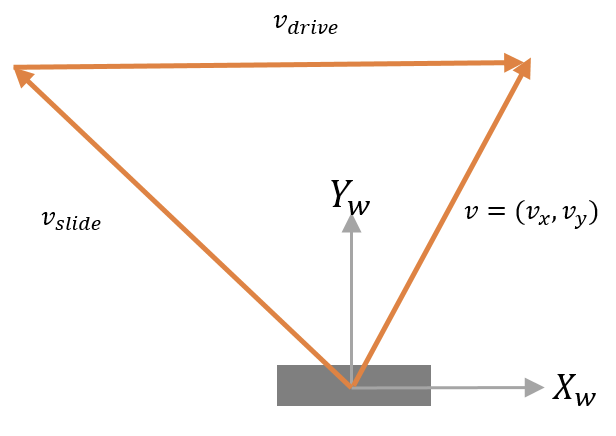


$v=v_w = (v_x,v_y)$ velocity of the robot written in frame $W$


$$
v_{drvie} = v_{x} + v_{y} tan{\lambda}
$$

$$
v_{slide} = \frac{v_{y}}{cos\lambda}
$$


$v_{drvie}$ could be written based on control input($u$) and wheel radius($r$).
$$
r \times u_i  = v_{drive} \rightarrow u = \frac{v_{drvie}}{r} = \frac{v_{x} + v_{y} tan{\lambda}}{r} 
$$

$$
u_i = \begin{bmatrix} \frac{1}{r} \ \frac{tan\lambda}{r} \end{bmatrix} \begin{bmatrix} v_{x} \\ v_{y} \end{bmatrix} 
$$

states of the system, with respect to the inertial frame, are given as:

$$
\mathbf{q} = \begin{bmatrix} x \\ y \\ \phi \end{bmatrix} 
$$


Now we need to move from inertial frame to body frame and then from body frame to wheel frame.

$$
\begin{bmatrix} \dot{x_B} \\ \dot{y_B} \\ \dot{\phi_B} \end{bmatrix} = R_{S}^{B} \begin{bmatrix} \dot{x} \\ \dot{y} \\ \dot{\phi} \end{bmatrix}
$$

where $R_{S}^{B}$ is :

$$
\begin{bmatrix} 1 \ 0 \ 0  \\ 0 \ cos(\phi) \ sin(\phi) \\ 0\ -sin(\phi) \ cos(\phi) \end{bmatrix} 
$$

Now we have velocities with respect to frame B given at the centroid of this frame. We need to calcuate these velecities, with repsect to the same frame (B), in each wheel center location
$$
\begin{bmatrix} -y_{i} \ 1 \ 0  \\ x_{i} \ 0 \ 1 \end{bmatrix} R_{S}^{B} \dot{q}
$$

where $(x_i,y_i)$ are the center position of the wheel with respect to the center of frame B. Finally, frame rotation from B to W is needed to have eveything in frame W
$$
\begin{bmatrix} v_{x} \\ v_{y} \end{bmatrix}  = \begin{bmatrix} 1 \ 0 \ 0  \\ 0 \ cos(\beta) \ sin(\beta) \\ 0\ -sin(\beta) \ cos(\beta) \end{bmatrix}  \begin{bmatrix} -y_{i} \ 1 \ 0  \\ x_{i} \ 0 \ 1 \end{bmatrix} R_{S}^{B} \dot{q}
$$

Therefore, $u_i$, control input of wheel i, is written as : 

$$
u_i = \begin{bmatrix} \frac{1}{r} \ \frac{tan\lambda}{r} \end{bmatrix} \begin{bmatrix} 1 \ 0 \ 0  \\ 0 \ cos(\beta) \ sin(\beta) \\ 0\ -sin(\beta) \ cos(\beta) \end{bmatrix}  \begin{bmatrix} -y_{i} \ 1 \ 0  \\ x_{i} \ 0 \ 1 \end{bmatrix} R_{S}^{B} \dot{q}
$$

$$
u_i = h_{i}(\phi)\dot{q}
$$

If there are "m" wheels in the robot, then the stacked form of the above equation is given as

$$
u = \begin{bmatrix} h_{1}{\phi} \\ h_{2}{\phi} \\ . \\ . \\ .\\ h_{m}{\phi} \end{bmatrix}\dot{q} = H(\phi)\dot{q}
$$

The above equation is known as "Inverse Velocity" equation that provides each wheel inputs given the state of the robot. The "Forward" equation is written as

$$
\dot{q} = H(\phi)^{-1}u
$$

Important note : In cases that number of wheels (m) is more than 3, $H(\phi)^{-1}$ is not invertable and pseudo inverse should be calculated.


# Example :D
Consider the following omini-directional mobile robot<br>
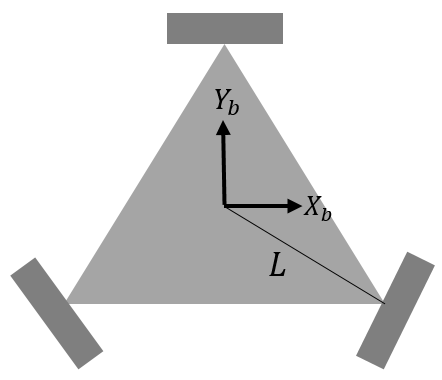


<table style="width:100%; text-align: center;">
  <tr>
    <th>Wheel</th>
    <th>Value</th>
  </tr>
  <tr>
    <td>Wheel 1 - Top</td>
    <td>$\beta = 0$; $x_i = 0$; $y_i = d$</td>
  </tr>
  <tr>
    <td>Wheel 2 - Bottom Right</td>
    <td>$\beta = -\frac{2\pi}{3}$; $x_i = l \cos 30$; $y_i = -l \sin 30$</td>
  </tr>
  <tr>
    <td>Wheel 3 - Bottom Left</td>
    <td>$\beta = \frac{2\pi}{3}$; $x_i = -l \cos 30$; $y_i = -l \sin 30$</td>
  </tr>
</table>

$$
H = \frac{1}{r}
\begin{bmatrix}
-L & 1.41 \cos(\phi - 1.30) & 1.41 \sin(\phi - 1.30) \\
-L & 1.41 \cos(\phi + 2.87) & 1.41 \sin(\phi + 2.87)\\
-L & 1.41 \cos(\phi + 0.785) & 1.41 \sin(\phi + 0.78) 
\end{bmatrix}
$$

$$
\rightarrow H(\phi) = \frac{1.41}{r}
\begin{bmatrix}
-0.707L & \cos(\phi - 1.30) & \sin(\phi - 1.30) \\
-0.707L & \cos(\phi + 2.87) & \sin(\phi + 2.87) \\
-0.707L & \cos(\phi + 0.785) & \sin(\phi + 0.78)
\end{bmatrix}
$$



Therefore, the forward kinematic equation of the robot would be:

$$
\dot{q} = H^{-1}u
$$

Where $H^{-1}$ is equal to the following matrix:

$$
R* 
\begin{bmatrix}
-0.27(s(\phi - 1.3) - s(\phi + 2.9)) & 0.27(s(\phi + 2.9) - s(\phi + 0.78)) & 0.27(s(\phi - 1.3) - s(\phi + 0.78)) \\
0.27(c(\phi - 1.3) - c(\phi + 2.9)) & 0.27(c(\phi + 2.9) - c(\phi + 0.78)) & -0.27(c(\phi - 1.3) - c(\phi + 0.78)) \\
\frac{0.33}{L} & 0.33 & \frac{0.33}{L} 
\end{bmatrix}
$$

$s$ and $c$ stand for $\sin$ and $\cos$ respectively. Based on the above equation, the state space model of the robot could be written. It is known that:

$$
\dot{q} = 
\begin{bmatrix}
\dot{x} \\
\dot{y} \\
\dot{\phi} 
\end{bmatrix}
= 
\begin{bmatrix}
\frac{x_t - x_{t-1}}{dt} \\
\frac{y_t - y_{t-1}}{dt} \\
\frac{\phi_t - \phi_{t-1}}{dt} 
\end{bmatrix}
$$

$$
\rightarrow
\begin{bmatrix}
x_t \\
y_t \\
\phi_t 
\end{bmatrix}
=
\begin{bmatrix}
x_{t-1} \\
y_{t-1} \\
\phi_{t-1} 
\end{bmatrix}
+ H^{-1} dt * u
$$





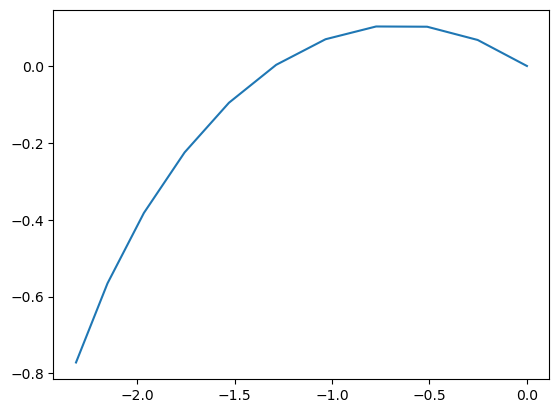

In [50]:
import numpy as np 
all_x = []
all_y = []
all_theta = []
x_initial = 0 
y_initial = 0 
phi_initial = 0 

all_x.append(x_initial)
all_y.append(y_initial)
all_theta.append(phi_initial)

robot_lambda = np.pi/4
beta = [0,-2*np.pi/3,2*np.pi/3]
dt = 0.1
r = 10 # robot radious in cm 
l = 7.5/(np.sin(np.deg2rad(60)))
delta = 3*l*np.cos(np.pi/4)

u = np.array([1,1,1.37])

robot_location = [y_initial,x_initial,phi_initial]

mean_distribution = np.array([0,0,0])
var_distribution = 0.0
cov_distribution = 0
R = np.array([[var_distribution,cov_distribution,cov_distribution],[cov_distribution,var_distribution,cov_distribution],[cov_distribution,cov_distribution,var_distribution]])
motion_dist = np.random.multivariate_normal(mean_distribution , R)


for i in range(10):
  Delta = np.array([robot_location[2] + beta[0] + robot_lambda, robot_location[2] + beta[1] + robot_lambda , robot_location[2] + beta[2] + robot_lambda])
  B = r*np.cos(robot_lambda)*dt*np.array([[np.cos(Delta[0]),np.cos(Delta[1]),np.cos(Delta[2])],[np.sin(Delta[0]),np.sin(Delta[1]),np.sin(Delta[2])],[1/delta,1/delta,1/delta]])

  robot_location[1] += np.dot(B[0,:],u) + motion_dist[0]
  robot_location[0] += np.dot(B[1,:],u) + motion_dist[1]
  robot_location[2] += np.dot(B[2,:],u) + motion_dist[2]  



  all_x.append(robot_location[1])
  all_y.append(robot_location[0])
  all_theta.append(robot_location[2])

import matplotlib.pyplot as plt 

plt.plot(all_x,all_y)